<a href="https://colab.research.google.com/github/Monisha603/oibsip_takeno/blob/main/Customer_Segmentation_Analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Load and inspect the dataset

In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.fillna(0, inplace=True)

# Data Cleaning

In [ ]:
df_cleaned = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])


In [ ]:
df_cleaned['reviews_per_month'].fillna(0, inplace=True)

<ipython-input-9-df7b6b2b0ba0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['reviews_per_month'].fillna(0, inplace=True)


In [ ]:
df_cleaned.isnull().sum()

,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0
calculated_host_listings_count,0


# Select Features for Clustering

In [ ]:
X = df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

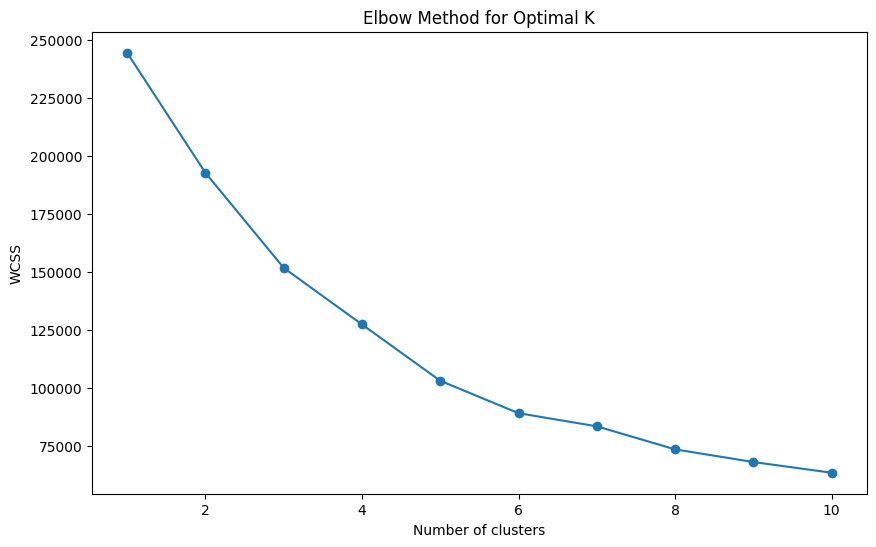

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Visualization of Clusters

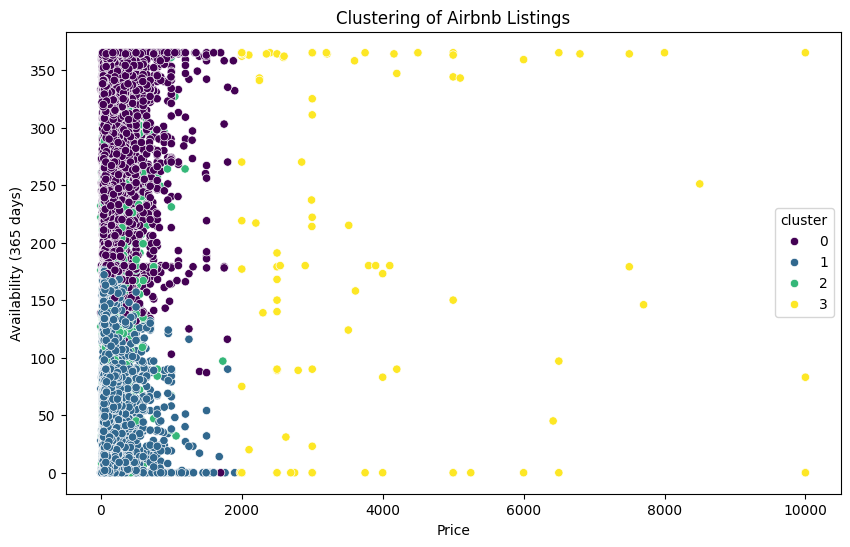

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='availability_365', hue='cluster', data=df_cleaned, palette='viridis')
plt.title('Clustering of Airbnb Listings')
plt.xlabel('Price')
plt.ylabel('Availability (365 days)')
plt.show()


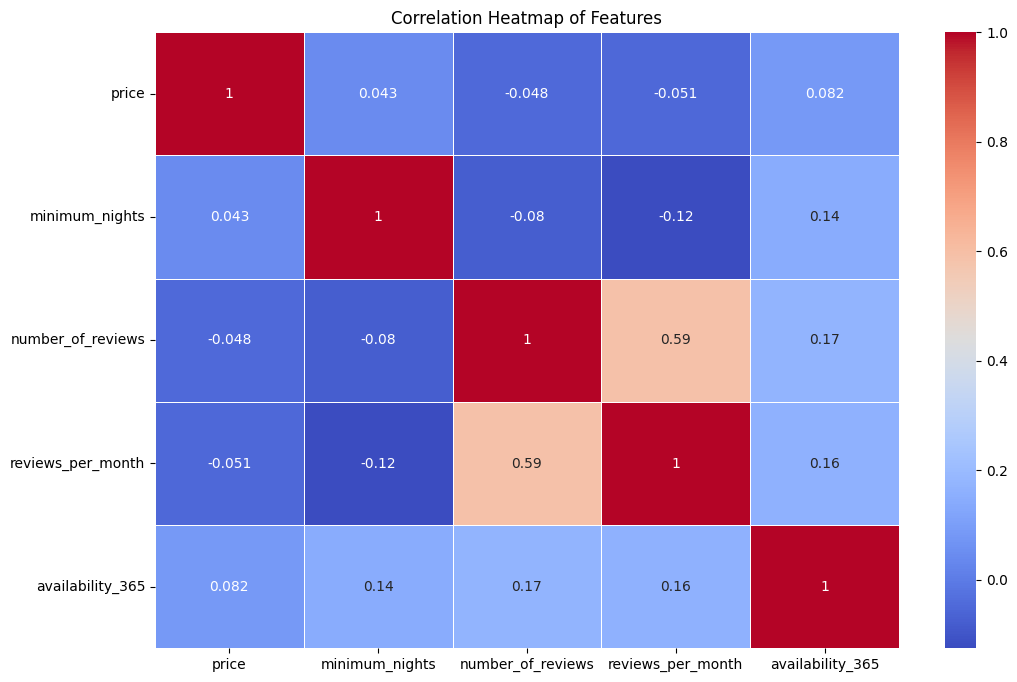

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


# Insights and Analysis

In [ ]:
cluster_summary = df_cleaned.groupby('cluster').agg({
    'price': ['mean', 'median'],
    'minimum_nights': ['mean', 'median'],
    'number_of_reviews': ['mean', 'median'],
    'availability_365': ['mean', 'median']
})

print(cluster_summary)


               price         minimum_nights        number_of_reviews         \
                mean  median           mean median              mean median   
cluster                                                                       
0         175.206913   125.0      14.433509    3.0         13.366088    5.0   
1         135.194782   100.0       4.764560    3.0          8.536579    3.0   
2         126.244469   100.0       2.556405    2.0         98.506556   86.0   
3        3697.885965  2945.0      23.771930    2.0          4.403509    0.0   

        availability_365         
                    mean median  
cluster                          
0             288.846637  311.0  
1              22.515426    0.0  
2             153.320951  142.0  
3             189.666667  180.0  


# Recommendations

In [ ]:
def get_recommendation(row):
    if row['cluster'] == 0:
        return "Low price and high availability: Promote to budget travelers and highlight affordability."
    elif row['cluster'] == 1:
        return "Moderate price with low reviews: Consider promotional campaigns or discounts to attract reviews."
    elif row['cluster'] == 2:
        return "High price but low availability: This segment can focus on premium marketing for exclusive stays."
    elif row['cluster'] == 3:
        return "Moderate price with high reviews: Focus on maintaining good service quality and target returning customers."
    else:
        return "No specific recommendation."

# Apply the recommendation to each listing
df_cleaned['recommendation'] = df_cleaned.apply(get_recommendation, axis=1)

# Display the listings with their recommendations
print(df_cleaned[['price', 'availability_365', 'number_of_reviews', 'cluster', 'recommendation']].head(10))

   price  availability_365  number_of_reviews  cluster  \
0    149               365                  9        0   
1    225               355                 45        0   
2    150               365                  0        0   
3     89               194                270        2   
4     80                 0                  9        1   
5    200               129                 74        1   
6     60                 0                 49        1   
7     79               220                430        2   
8     79                 0                118        2   
9    150               188                160        2   

                                      recommendation  
0  Low price and high availability: Promote to bu...  
1  Low price and high availability: Promote to bu...  
2  Low price and high availability: Promote to bu...  
3  High price but low availability: This segment ...  
4  Moderate price with low reviews: Consider prom...  
5  Moderate price with low revi